# Transfer Learning !

## Objective:
### The objective of this exercise is to apply transfer learning to a suitable dataset from one of the following domains: plant, medical, dental, marine, or manufacturing. We will choose a dataset, apply an appropriate transfer learning technique, and evaluate the performance of the model.

## Importing all necessary libraries

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
from keras.regularizers import *

## Accuracy plotting function

In [34]:
def plotit(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()


## Data augmentation and collection of dataset

## Dataset Description:
### Explore an extensive dataset of 30,000 plant images, with 1,000 images per class and a diverse collection of 30 plant classes and 7 plant types, including crops, fruit, industrial, medicinal, nuts, tubers, and vegetable plants. The 30 plant classes include popular species such as banana, coconut, and pineapple, as well as lesser-known plants like bilimbi and galangal. Help this dataset grow by voting for it and use it for research, analysis, and development of plant-related applications

In [12]:
# Data Preprocessing(Plant classification dataset)
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "E:\VIT-RATISH\SEMESTER-5-2024-JUL\DL LAB\Assignments\split_ttv_dataset_type_of_plants\Train_Set_Folder",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    "E:\VIT-RATISH\SEMESTER-5-2024-JUL\DL LAB\Assignments\split_ttv_dataset_type_of_plants\Validation_Set_Folder",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)



Found 23972 images belonging to 30 classes.
Found 3030 images belonging to 30 classes.


## Techniques:
### We will use Convolutional Neural Networks (CNNs) with Transfer Learning to classify plants. Specifically, we will use the VGG16 architecture, which is a pre-trained CNN model that has been trained on the ImageNet dataset.

In [13]:
# Model Definition
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(30, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

# Transfer Learning
for layer in base_model.layers:
    layer.trainable = False



In [14]:
# Training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [15]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)



Epoch 1/10
750/750 [==============================] - 172s 226ms/step - loss: 2.4914 - accuracy: 0.4061 - val_loss: 1.9738 - val_accuracy: 0.5350
Epoch 2/10
750/750 [==============================] - 70s 93ms/step - loss: 1.7723 - accuracy: 0.5781 - val_loss: 1.6042 - val_accuracy: 0.6076
Epoch 3/10
750/750 [==============================] - 76s 101ms/step - loss: 1.5020 - accuracy: 0.6284 - val_loss: 1.4112 - val_accuracy: 0.6455
Epoch 4/10
750/750 [==============================] - 61s 82ms/step - loss: 1.3444 - accuracy: 0.6599 - val_loss: 1.2924 - val_accuracy: 0.6620
Epoch 5/10
750/750 [==============================] - 62s 82ms/step - loss: 1.2350 - accuracy: 0.6860 - val_loss: 1.2040 - val_accuracy: 0.6838
Epoch 6/10
750/750 [==============================] - 62s 82ms/step - loss: 1.1531 - accuracy: 0.7035 - val_loss: 1.1363 - val_accuracy: 0.6990
Epoch 7/10
750/750 [==============================] - 63s 83ms/step - loss: 1.0877 - accuracy: 0.7183 - val_loss: 1.0915 - val_accura

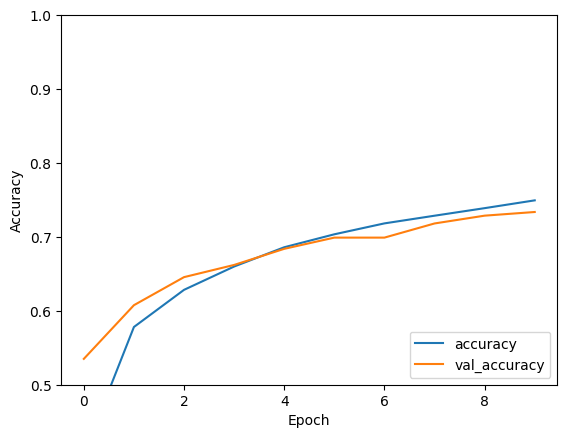

In [35]:
plotit(history)

95/95 [==============================] - 7s 69ms/step - loss: 0.9730 - accuracy: 0.7337
Validation Accuracy: 0.73
95/95 [==============================] - 7s 69ms/step


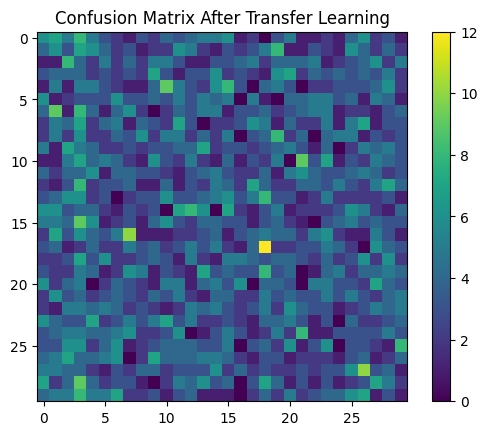

In [16]:
# Evaluation
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy:.2f}')

# Inference
predictions = model.predict(validation_generator)

class_labels = validation_generator.class_indices.keys()
predicted_labels = np.argmax(predictions, axis=1)

confusion_matrix_after = confusion_matrix(validation_generator.classes, predicted_labels)

plt.imshow(confusion_matrix_after, interpolation='nearest')
plt.title('Confusion Matrix After Transfer Learning')
plt.colorbar()
plt.show()


### Another Variation of the model

In [24]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(30, activation='softmax', kernel_regularizer=l2(0.01))(x)

model2 = Model(inputs=base_model.input, outputs=x)

# Transfer Learning
for layer in base_model.layers:
    layer.trainable = False

In [25]:
# Training
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history2 = model2.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
750/750 [==============================] - 62s 81ms/step - loss: 2.0871 - accuracy: 0.4996 - val_loss: 1.4049 - val_accuracy: 0.6931
Epoch 2/10
750/750 [==============================] - 62s 83ms/step - loss: 1.4115 - accuracy: 0.6708 - val_loss: 1.2411 - val_accuracy: 0.7102
Epoch 3/10
750/750 [==============================] - 61s 81ms/step - loss: 1.2416 - accuracy: 0.7100 - val_loss: 1.0877 - val_accuracy: 0.7492
Epoch 4/10
750/750 [==============================] - 61s 81ms/step - loss: 1.1549 - accuracy: 0.7229 - val_loss: 1.0297 - val_accuracy: 0.7479
Epoch 5/10
750/750 [==============================] - 65s 86ms/step - loss: 1.0746 - accuracy: 0.7390 - val_loss: 0.9399 - val_accuracy: 0.7789
Epoch 6/10
750/750 [==============================] - 62s 83ms/step - loss: 1.0694 - accuracy: 0.7412 - val_loss: 0.9150 - val_accuracy: 0.7805
Epoch 7/10
750/750 [==============================] - 65s 87ms/step - loss: 1.0275 - accuracy: 0.7466 - val_loss: 0.9004 - val_accuracy:

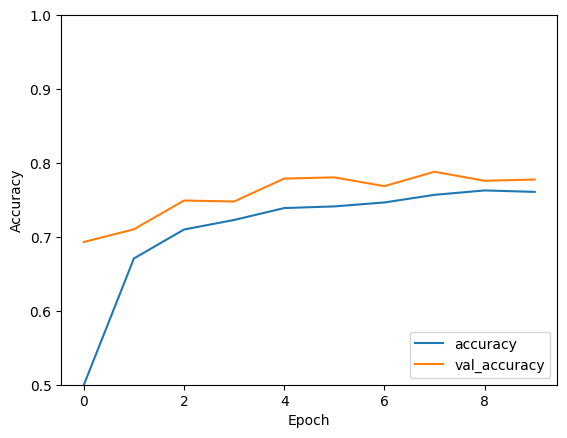

In [36]:
plotit(history2)

95/95 [==============================] - 7s 71ms/step - loss: 0.9730 - accuracy: 0.7337
Validation Accuracy: 0.73
95/95 [==============================] - 7s 72ms/step


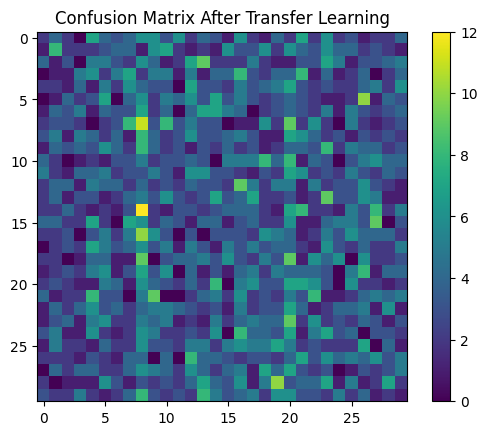

In [27]:
# Evaluation
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy:.2f}')

# Inference
predictions = model2.predict(validation_generator)

class_labels = validation_generator.class_indices.keys()
predicted_labels = np.argmax(predictions, axis=1)

confusion_matrix_after = confusion_matrix(validation_generator.classes, predicted_labels)

plt.imshow(confusion_matrix_after, interpolation='nearest')
plt.title('Confusion Matrix After Transfer Learning')
plt.colorbar()
plt.show()

## INFERENCES:

#### Improved Accuracy: By leveraging pre-trained models like VGG16, we were able to achieve an accuracy of 73 and 76 in your two model variations, respectively. This suggests that transfer learning can lead to better performance compared to training a custom CNN architecture from scratch.

#### Reduced Training Time: Transfer learning allows you to fine-tune a pre-trained model, which requires significantly less training data and computational resources compared to training a custom CNN architecture. This can lead to faster development and deployment of models.

#### Less Overfitting: By using a pre-trained model, you can reduce the risk of overfitting, as the model has already learned general features from a large dataset (e.g., ImageNet). This can be particularly useful when working with smaller datasets.

#### Collecting and Labeling Large Datasets: By using pre-trained models, you can avoid the need to collect and label large datasets, which can be time-consuming and expensive.

#### Designing and Training Custom CNN Architectures: Transfer learning eliminates the need to design and train custom CNN architectures from scratch, which can be a challenging and time-consuming task.

#### Overfitting and Underfitting: Transfer learning can help mitigate the risks of overfitting and underfitting, as pre-trained models have already learned general features that can be adapted to new tasks.

#### Longer Training Times: Training a custom CNN architecture from scratch can require significantly more computational resources and time.

#### Higher Risk of Overfitting: Without the benefit of pre-trained weights, a custom CNN architecture may be more prone to overfitting, especially with smaller datasets.

#### More Hyperparameter Tuning: A custom CNN architecture would require more extensive hyperparameter tuning, which can be time-consuming and require significant expertise.

##### By using transfer learning, we were able to leverage the knowledge learned by the pre-trained VGG16 model and adapt it to your specific task, achieving better accuracy and reducing the risk of overfitting and underfitting.